# **Webscraping the Questions & Tags from `Stack exchange`**


Here, our ultimate goal is to scrape the Questions & Tags for the webpage Stack Echange of Astronomy category webpage for all the respective pages.

### Importing essential libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import re
from wordcloud import WordCloud 



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import requests
from requests import get
import warnings
warnings.filterwarnings("ignore")
from requests import get
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.util import *
from nltk.corpus import stopwords
import re
import seaborn as sns
from collections import defaultdict

### Required Pages for Web Scraping:
https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50  
https://astronomy.stackexchange.com/questions?tab=newest&page=2  
:  
:  
:  
:  
:  
https://astronomy.stackexchange.com/questions?tab=newest&page=196  

### creating a list to store the links of all the required pages 

In [ ]:
pages_list=[]                         # Empty list that will be appended with the page count

pages_list.append("https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50")

for page in list(range(2, 197)):     # Looping over first 196 webpages

  pages_list.append('https://astronomy.stackexchange.com/questions?tab=newest&page='+str(page))
  
#pages_list  
print(len(pages_list))

196


# **Webscraping Questions**

In [ ]:
questions_list=[]                     # Creating an empty list of questions that will be appended with the question counts.

for x in pages_list:                  # Looping over all the pages in the page list
  page = requests.get(x)
  soup = BeautifulSoup(page.text, 'html.parser')

  question_name = soup.find_all('h3')   # Finding the h3 tag that has details of the question
  for question in question_name:
        if question.find('a'):
            questions_list.append(question.find('a').text)

In [ ]:
questions_list[:5]

['current community',
 'more stack exchange communities',
 'Calculate the absolute magnitude for a multi-star system',
 'Do the stars in irregular galaxies orbit anything?',
 "By how much does Haumea's fast rotation affect its surface gravity?"]

### As we can in the above output, the `question_list` also contains some unwanted rows which are not the questions i.e. `current community` and `more stack exchange communities`. Hence, we'll remove these rows.

In [ ]:
a = ['current community', 'more stack exchange communities']

In [ ]:
df1 = pd.DataFrame(questions_list, columns =['Questions']) 

In [ ]:
df1.head()

,Questions
0,current community
1,more stack exchange communities
2,Calculate the absolute magnitude for a multi-s...
3,Do the stars in irregular galaxies orbit anyth...
4,By how much does Haumea's fast rotation affect...


In [ ]:
df1 = df1[~df1['Questions'].isin(a)]

In [ ]:
df1.head()

,Questions
2,Calculate the absolute magnitude for a multi-s...
3,Do the stars in irregular galaxies orbit anyth...
4,By how much does Haumea's fast rotation affect...
5,Is there an O1 or O0 star?
6,Evolution of galaxies with time


In [ ]:
print(len(df1))

9792


# **Webscraping Tags**

In [ ]:
def ListToString(string):
  # initialize an empty string 
  string1 = ""
    
  # traverse in the string   
  for element in string:  
      string1 = string1 + element   
     
  return string1

# To get the tags from the webpage
tag=[]

for x in pages_list:
  page = requests.get(x)
  soup = BeautifulSoup(page.text, 'html.parser')

  tags=[]

  for div in soup.find_all('div', {"class": re.compile("^tags")}):      
    tags.append(div.get('class')[1:])

  clean_tags=[]

  for i in tags:
    clean_tags.append(ListToString(i).replace('t-','|'))

  for j in clean_tags:
    tag.append(j[1:])

In [ ]:
print(len(tag))
print(tag[:11])

9792
['galaxy|galactic-dynamics', 'gravity|rotation', 'star|temperature|spectral-type', 'star|galaxy|dark-matter', 'natural-satellites|gas-giants|mathematics|eclipse-non-earth-related', 'star|galaxy|galactic-halo', 'quasars|galactic-evolution', 'cosmology|expansion', 'photography|pluto', 'planet|saturn|heat', 'galaxy|milky-way|orbital-elements|sagittarius-a']


In [ ]:
print(tag[0])
print(tag[-1])

galaxy|galactic-dynamics
inclination|amateur-observing


### **Storing the `tag` list in `df` dataframe**

In [ ]:
df1['Tags']=tag

In [ ]:
df1.head()

,Questions,Tags
2,Calculate the absolute magnitude for a multi-s...,galaxy|galactic-dynamics
3,Do the stars in irregular galaxies orbit anyth...,gravity|rotation
4,By how much does Haumea's fast rotation affect...,star|temperature|spectral-type
5,Is there an O1 or O0 star?,star|galaxy|dark-matter
6,Evolution of galaxies with time,natural-satellites|gas-giants|mathematics|ecli...


In [ ]:
df1.tail()

,Questions,Tags
10179,Why can't light escape from a black hole?,black-hole|light
10180,Why do sunspots appear dark?,the-sun|sunspots
10181,Amateur observing targets for binary star syst...,amateur-observing|binary-star
10182,How are the compositional components of exopla...,exoplanet|atmosphere
10183,How do I calculate the inclination of an objec...,inclination|amateur-observing


In [ ]:
len(df1)

9792

# **Data Analysis**

# Wordcloud for `Tags`

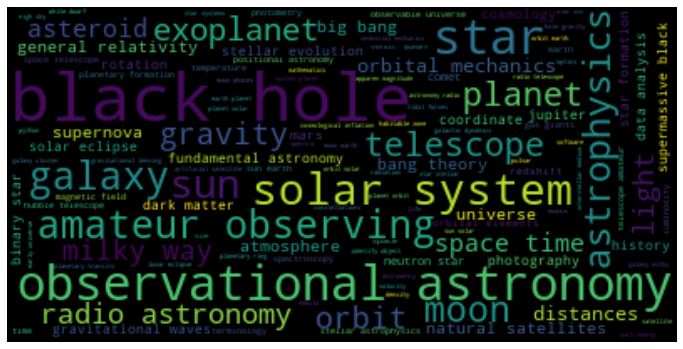

In [ ]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Tag in df1['Tags']:
    vocab.append(Tag)

vocab=', '.join(vocab)
#print(vocab)


# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud for `Questions`

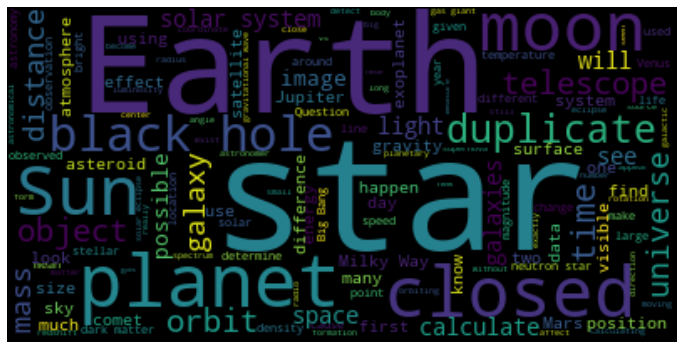

In [ ]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Question in df1['Questions']:
    vocab.append(Question)

vocab=', '.join(vocab)
#print(vocab)






# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Data Preprocessing**

In [ ]:
# Removing special characters, hyperlinks/URL's from the Questions.

df1['Questions'] = df1['Questions'].str.replace(';','').str.replace(':','').str.replace('/',' or ').str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'",'').str.replace('.','')

In [ ]:
df1["Tags"] = [item.replace("|", " __label__") for item in df1["Tags"]]
df1['Tags'] ='__label__' + df1['Tags'].astype(str)
df1.head()

,Questions,Tags
2,Calculate the absolute magnitude for a multi-s...,__label__galaxy __label__galactic-dynamics
3,Do the stars in irregular galaxies orbit anyth...,__label__gravity __label__rotation
4,By how much does Haumeas fast rotation affect ...,__label__star __label__temperature __label__sp...
5,Is there an O1 or O0 star?,__label__star __label__galaxy __label__dark-ma...
6,Evolution of galaxies with time,__label__natural-satellites __label__gas-giant...


In [ ]:
columns_titles = ["Tags","Questions"]
df1=df1.reindex(columns=columns_titles)
df1.head()

,Tags,Questions
2,__label__galaxy __label__galactic-dynamics,Calculate the absolute magnitude for a multi-s...
3,__label__gravity __label__rotation,Do the stars in irregular galaxies orbit anyth...
4,__label__star __label__temperature __label__sp...,By how much does Haumeas fast rotation affect ...
5,__label__star __label__galaxy __label__dark-ma...,Is there an O1 or O0 star?
6,__label__natural-satellites __label__gas-giant...,Evolution of galaxies with time


# **Writing a `.txt` file from our dataframe data**

In [ ]:
f= open("astronomy_n.txt","w+") #open the file for writing
f.close() #finally closing the file 

In [ ]:
df1.to_csv(r'astronomy_n.txt', header=None, index=None, sep=' ', mode='a')

In [ ]:
with open('astronomy_n.txt', 'r') as f, open('astronomy.txt', 'w') as fo:
    for line in f:
        fo.write(line.replace('"', '').replace("'", ""))

# **Splitting the `astronomy.txt` file into Training and Validation for fastText**

In [ ]:
!head astronomy.txt

__label__galaxy __label__galactic-dynamics Calculate the absolute magnitude for a multi-star system
__label__gravity __label__rotation Do the stars in irregular galaxies orbit anything?
__label__star __label__temperature __label__spectral-type By how much does Haumeas fast rotation affect its surface gravity?
__label__star __label__galaxy __label__dark-matter Is there an O1 or O0 star?
__label__natural-satellites __label__gas-giants __label__mathematics __label__eclipse-non-earth-related Evolution of galaxies with time
__label__star __label__galaxy __label__galactic-halo How to calculate the frequency of a gas giant eclipsing the sun from a moon?
__label__quasars __label__galactic-evolution Plotting Histograms of stellar mass and gas mass given a halo mass
__label__cosmology __label__expansion Can Quasars generate Heavy Elements?
__label__photography __label__pluto Could there really be a preferential direction to the speed of light?
__label__planet __label__saturn __label__heat How br

In [ ]:
!wc astronomy.txt

   9792  125312 1099217 astronomy.txt


In [ ]:
# Splitting the data into training and validation.

train_data= round(len(df1)*0.85)
validation_data = round(len(df1)*0.15) 

print("Number of records for training dataset are:", train_data)
print("Number of records for validation dataset are:", validation_data)

Number of records for training dataset are: 8323
Number of records for validation dataset are: 1469


In [ ]:
training_data =pd.read_table("astronomy.txt", nrows=train_data,header=None,error_bad_lines=False,sep='\t')

valid_data =pd.read_table("astronomy.txt",skiprows=train_data,nrows=validation_data,
                          header=None,error_bad_lines=False,sep='\t')

In [ ]:
# Saving the training and validation files.

np.savetxt('astronomy.train', training_data.values, fmt='%s', delimiter='\t')
np.savetxt('astronomy.val', valid_data.values, fmt='%s', delimiter='\t')

### **Training Data**

In [ ]:
print(training_data.head())
print(len(training_data))

                                                   0
0  __label__galaxy __label__galactic-dynamics Cal...
1  __label__gravity __label__rotation Do the star...
2  __label__star __label__temperature __label__sp...
3  __label__star __label__galaxy __label__dark-ma...
4  __label__natural-satellites __label__gas-giant...
8323


### **Validation Data**

In [ ]:
print(valid_data.head())
print(len(valid_data))

                                                   0
0  __label__the-moon __label__solar-system __labe...
1  __label__fundamental-astronomy US observations...
2  __label__telescope __label__exoplanet __label_...
3  __label__the-moon __label__gravity __label__ea...
4  __label__black-hole __label__roche-limit Do Ro...
1469


# **Applying FastText on `astronomy.txt` file**

In [ ]:
pip install fasttext

In [ ]:
import fasttext

### **Training our first model**

In [ ]:
model_1 = fasttext.train_supervised(input="astronomy.train")

In [ ]:
model_1.test("astronomy.val")

(1469, 0.13546630360789652, 0.05963440215762661)

### As we can see that when the passed the train data to the fastText Model without pre-processing, the model gave a precision of 13%.

## making model better & processed

In [ ]:
cat astronomy.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > astronomy_preprocessed.txt

In [ ]:
!wc astronomy_preprocessed.txt

   9792  133645 1115725 astronomy_preprocessed.txt


In [ ]:
training_data =pd.read_table("astronomy_preprocessed.txt", nrows=train_data,header=None,error_bad_lines=False,sep='\t')

valid_data =pd.read_table("astronomy_preprocessed.txt",skiprows=train_data,nrows=validation_data,
                          header=None,error_bad_lines=False,sep='\t')

In [ ]:
# Saving the training and validation files.
np.savetxt('astronomy_preprocessed.train', training_data.values, fmt='%s', delimiter='\t')
np.savetxt('astronomy_preprocessed.val', valid_data.values, fmt='%s', delimiter='\t')

### **Now, training our second model with preprocessed astronomy data**

In [ ]:
model_2 = fasttext.train_supervised(input="astronomy_preprocessed.train")

In [ ]:
model_2.test("astronomy_preprocessed.val")

(1469, 0.17358747447243023, 0.07641594246329038)

### As we can see from the model_2 output, pre-processing the data surged the precision around 4%. Now, we can tune in and apply hyper parameters to have a look how the model precision improves in the process.

### **Now, training our third model with 25 epochs**

In [ ]:
model_3 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25)

In [ ]:
model_3.test("astronomy_preprocessed.val")

(1469, 0.49081007488087136, 0.21606233143542103)

### As we can see from the model_3 output, the epochs increased the precision rapidly to 49% from 17%. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our fourth model with 25 epochs & learning rate**

In [ ]:
model_4 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3)

In [ ]:
model_4.test("astronomy_preprocessed.val")

(1469, 0.5296119809394145, 0.23314354210368596)

### As we can see from the model_4 output, the learning rate also increased the precision by 4% from 49% to 53%. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our fifth model with 25 epochs, learning rate & word n-grams**

In [ ]:
model_5 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3, wordNgrams=2)

In [ ]:
model_5.test("astronomy_preprocessed.val")

(1469, 0.5323349217154527, 0.2343422235540905)

### As we can see from the model_5 output, the precision didn't change. So, we'll add word n-grams in our final model. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our sixth model with 25 epochs, learning rate & loss function**

In [ ]:
model_6 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3, loss='softmax', wordNgrams=2)

In [ ]:
model_6.test("astronomy_preprocessed.val")

(1469, 0.5323349217154527, 0.2343422235540905)

### As we can see from the model_6 output, the loss function slightly increased the precision. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our seventh model by scaling things up**

In [ ]:
model_7 = fasttext.train_supervised(input="astronomy_preprocessed.train", lr=0.3, epoch=25, bucket=200000, dim=300, loss='softmax', wordNgrams=2)

In [ ]:
model_7.test("astronomy_preprocessed.val")

(1469, 0.5248468345813478, 0.23104584956547797)

### Therefore, our final models with optimal precision and recall are `model_5` and `model_6`.

## **Creating a dataframe of the results which contains the type of model fitted and the Precision and Recall achieved with that Model fit.**

In [ ]:
Results = {"Model Type" : ['Model_Unprocessed','Model_PreProcessed','Model_PreProcessed_epochs','Model_PreProcessed_epochs_lr',
                        'Model_PreProcessed_epochs_lr_wordng','Model_PreProcessed_epochs_lr_loss','Model_PreProcessed_scaling_up'],
        "Precision": [model_1.test("astronomy.val")[1],model_2.test("astronomy_preprocessed.val")[1], model_3.test("astronomy_preprocessed.val")[1],model_4.test("astronomy_preprocessed.val")[1],model_5.test("astronomy_preprocessed.val")[1],model_6.test("astronomy_preprocessed.val")[1],model_7.test("astronomy_preprocessed.val")[1]],
        "Recall":[model_1.test("astronomy.val")[2], model_2.test("astronomy_preprocessed.val")[2],model_3.test("astronomy_preprocessed.val")[2],model_4.test("astronomy_preprocessed.val")[2],model_5.test("astronomy_preprocessed.val")[2],model_6.test("astronomy_preprocessed.val")[2],model_7.test("astronomy_preprocessed.val")[2]]}

Results_df = pd.DataFrame(Results)
Results_df

,Model Type,Precision,Recall
0,Model_Unprocessed,0.135466,0.059634
1,Model_PreProcessed,0.173587,0.076416
2,Model_PreProcessed_epochs,0.490810,0.216062
3,Model_PreProcessed_epochs_lr,0.529612,0.233144
4,Model_PreProcessed_epochs_lr_wordng,0.532335,0.234342
5,Model_PreProcessed_epochs_lr_loss,0.532335,0.234342
6,Model_PreProcessed_scaling_up,0.524847,0.231046


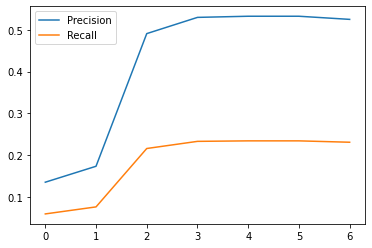

In [ ]:
lines = Results_df.plot.line()

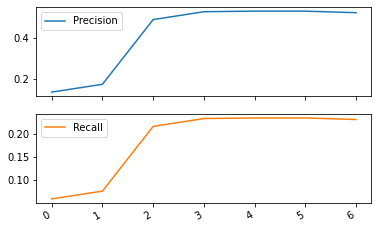

In [ ]:
axes = Results_df.plot.line(subplots=True)

# **Therefore, we noticed a significant rise in the precision of our `model_3` and after that we tried some hyperparameters to achieve an accuracy of 53%.**